# Trabalho Pratico 4
## Disciplina de Introdução a Processamento Digital de Imagens
Alunos: Thiago Evangelista e Rafael Paranhos

### Imports

In [281]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
## increse recursion limit
import sys
sys.setrecursionlimit(5000)

%matplotlib inline

## 1- Lendo e Pré Processando as Imagens

In [282]:
# Carregar a imagem e redimensionar
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Erro ao carregar a imagem.")
    else:
    # Redimensionar a imagem para 256x256 pixels
        img = cv2.resize(img, (256, 256))
    return img

(-0.5, 255.5, 255.5, -0.5)

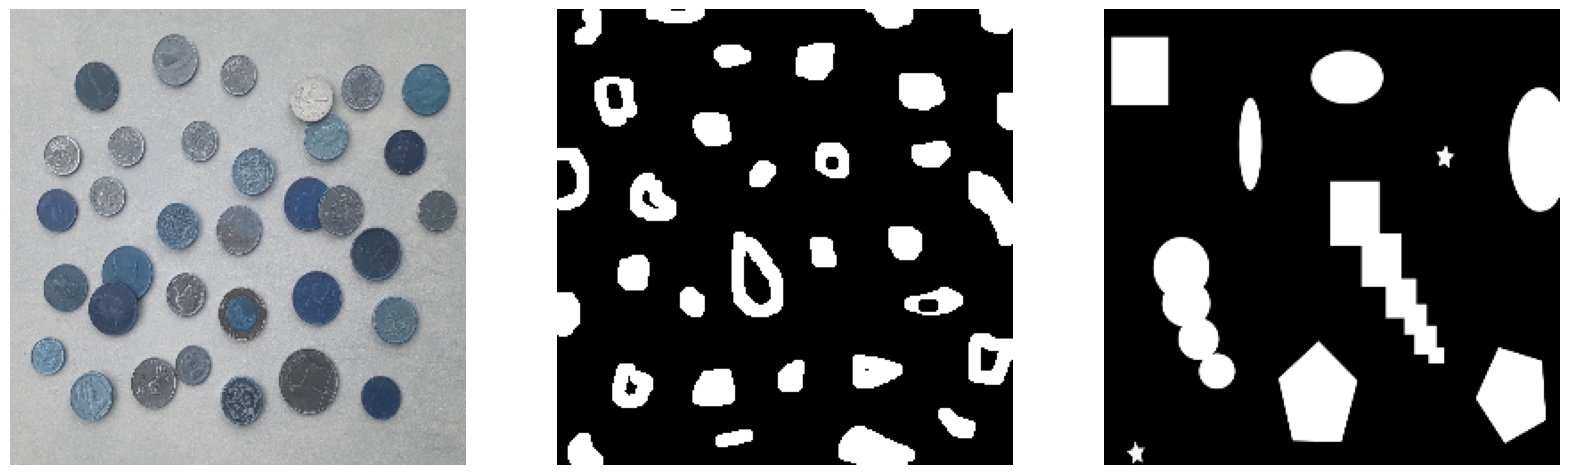

In [283]:
img_coins = load_image("coins-01.jpg")
img_bolhas = load_image('bolhas.png')
img_shapes = load_image('shapes.png')

# Exibir a imagem
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_coins, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_bolhas, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_shapes, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

In [284]:
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

def dilate(img, elemento):
    img_dilated = cv2.dilate(img, elemento, iterations=1)
    return img_dilated

def erode(img, elemento):
    img_eroded = cv2.erode(img, elemento, iterations=1)
    return img_eroded

def closing(img, elemento):
    img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, elemento)
    return img_closed

In [285]:
img_coins_blur = cv2.medianBlur(img_coins, 5)
img_bolhas_blur = cv2.medianBlur(img_bolhas, 5)
img_shapes_blur = cv2.medianBlur(img_shapes, 5)

(-0.5, 255.5, 255.5, -0.5)

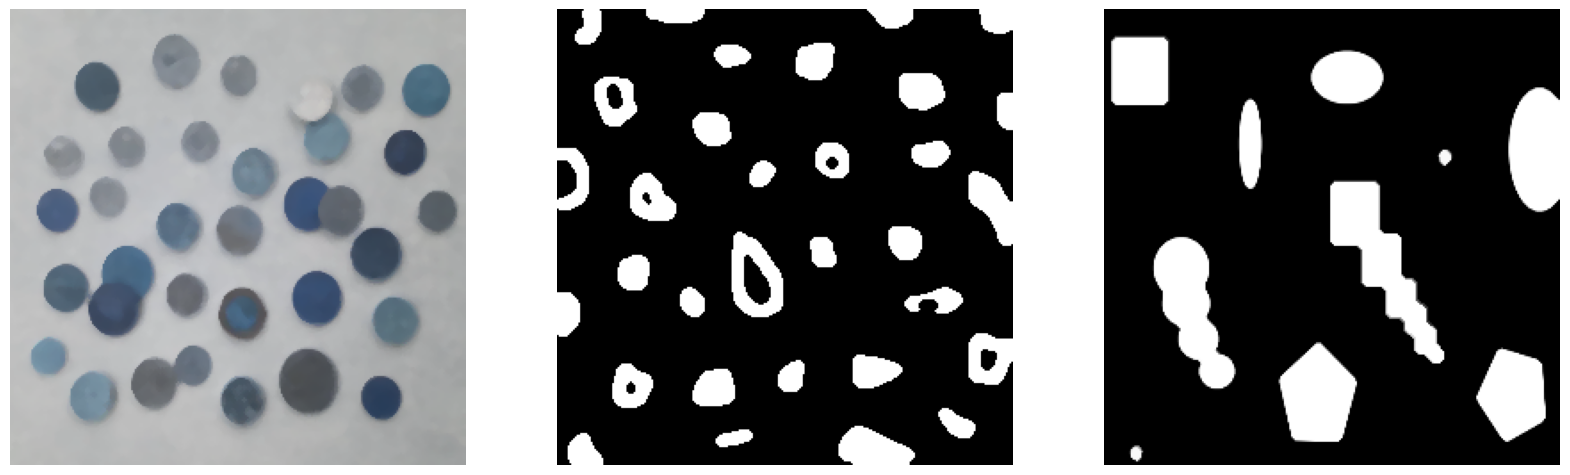

In [286]:
img_coins_eroded = erode(img_coins_blur, elemento)
img_coins_dilated = dilate(img_coins_eroded, elemento)
img_coins_closed = closing(img_coins_dilated, elemento)

img_bolhas_eroded = erode(img_bolhas_blur, elemento)
img_bolhas_dilated = dilate(img_bolhas_eroded, elemento)
img_bolhas_closed = closing(img_bolhas_dilated, elemento)

img_shapes_eroded = erode(img_shapes_blur, elemento)
img_shapes_dilated = dilate(img_shapes_eroded, elemento)
img_shapes_closed = closing(img_shapes_dilated, elemento)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_coins_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_bolhas_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_shapes_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

## 2- Extraindo Conteudo

Extraindo conteudo via detecçao de bordas com algoritmo de canny

(-0.5, 255.5, 255.5, -0.5)

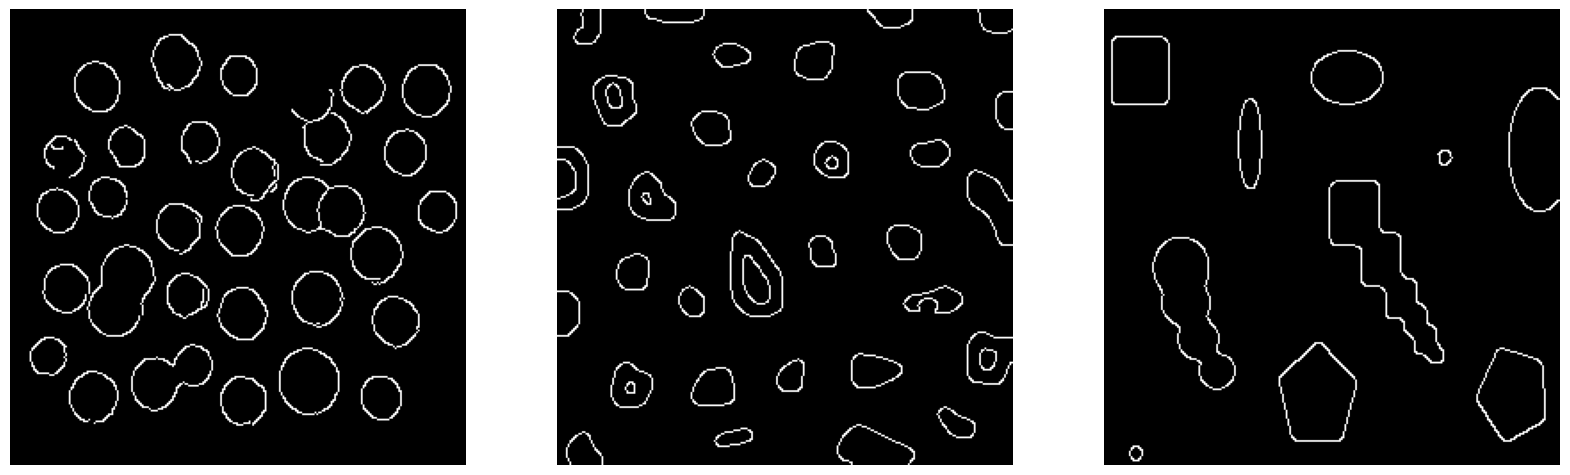

In [287]:
coins_canny = cv2.Canny(img_coins_closed, 100, 200)
bolhas_canny = cv2.Canny(img_bolhas_closed, 100, 200)
shapes_canny = cv2.Canny(img_shapes_closed, 100, 200)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(coins_canny, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(bolhas_canny, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(shapes_canny, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

## 3- Algoritmo de segmentaçao baseado em flood fill

(-0.5, 255.5, 255.5, -0.5)

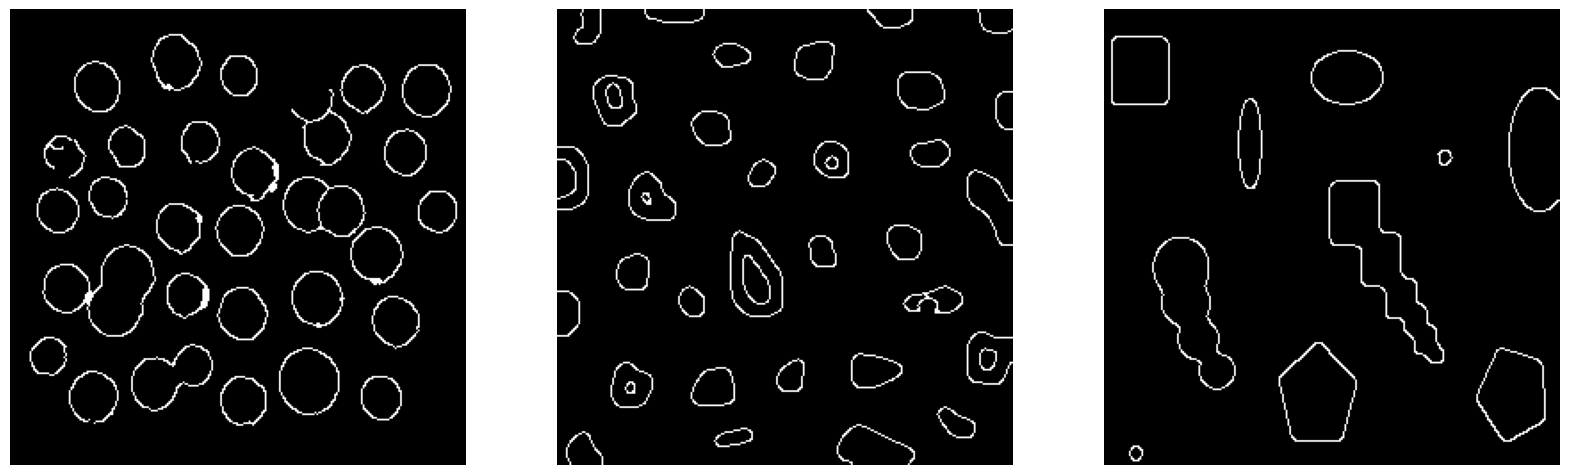

In [288]:
img_coins_closed = closing(coins_canny, elemento)
img_bolhas_closed = closing(bolhas_canny, elemento)
img_shapes_closed = closing(shapes_canny, elemento)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_coins_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_bolhas_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_shapes_closed, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

In [289]:
# Função para encontrar os contornos por meio do algoritmo de flood fill

def flood_fill(image):
    visited = np.zeros(image.shape, dtype=np.bool_)
    counter = 0
    component_conexa = np.zeros(image.shape, dtype=np.uint8)

    def get_neighbors(row, col):
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        return [(row + x, col + y) for [x, y] in directions if is_valid(row + x, col + y)]

    def is_valid(row, col):
        in_range = 0 <= row <= len(image) - 1 \
                   and 0 <= col <= len(image[0]) - 1
        return in_range and not visited[row][col] and image[row][col] == 255

    def dfs(row, col):
        if visited[row][col]:
             return
        visited[row][col] = True
        component_conexa[row][col] = counter


        for [x, y] in get_neighbors(row, col): dfs(x, y)

    for index_l, line in enumerate(image):
        for index_c, val in enumerate(line):
            if is_valid(index_l, index_c):
                counter += 1
                dfs(index_l, index_c)
                
    return component_conexa, counter


In [290]:
coins_cc,coins_counter = flood_fill(img_coins_closed)
bolhas_cc,bolhas_counter = flood_fill(img_bolhas_closed)
shapes_cc,shapes_counter = flood_fill(img_shapes_closed)

print("Número de componentes conexos na imagem de moedas: ", coins_counter)
print("Número de componentes conexos na imagem de bolhas: ", bolhas_counter)
print("Número de componentes conexos na imagem de formas: ", shapes_counter)

Número de componentes conexos na imagem de moedas:  30
Número de componentes conexos na imagem de bolhas:  39
Número de componentes conexos na imagem de formas:  10


(-0.5, 255.5, 255.5, -0.5)

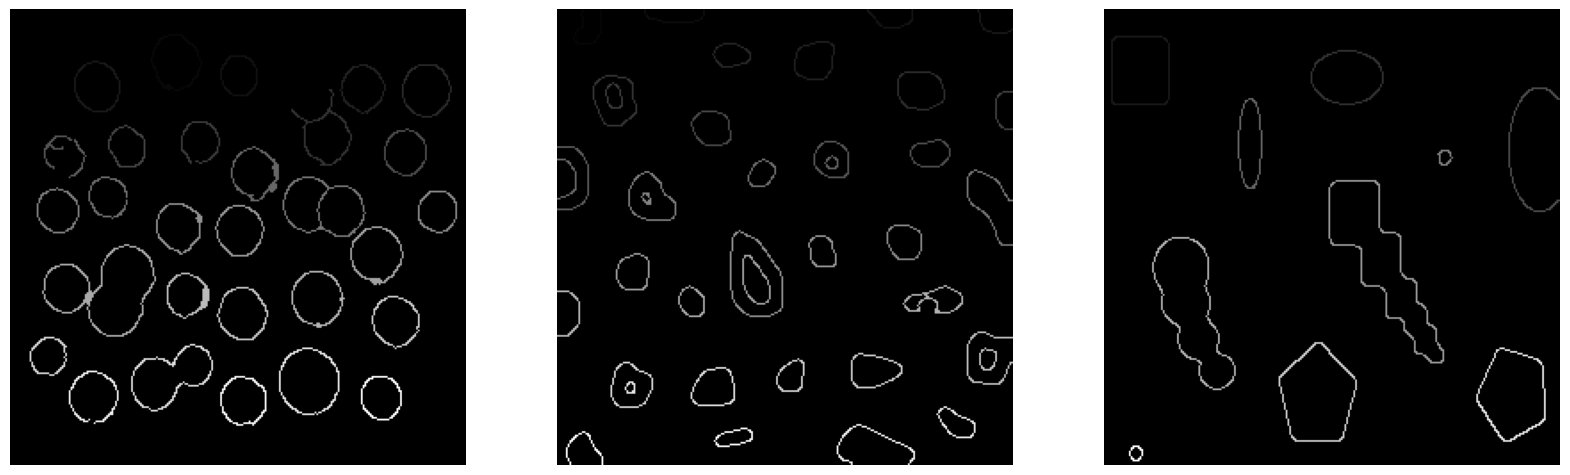

In [291]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(coins_cc, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(bolhas_cc, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(shapes_cc, cmap='gray')
plt.axis("off")


## 4- Colorindo os objetos

In [292]:
img_coins_cc_rgb = cv2.cvtColor(coins_cc, cv2.COLOR_GRAY2RGB)
img_res_coins = cv2.cvtColor(coins_cc, cv2.COLOR_GRAY2BGR)
img_res_coins = cv2.cvtColor(img_res_coins, cv2.COLOR_BGR2HSV)

img_bolhas_cc_rgb = cv2.cvtColor(bolhas_cc, cv2.COLOR_GRAY2RGB)
img_res_bolhas = cv2.cvtColor(bolhas_cc, cv2.COLOR_GRAY2BGR)
img_res_bolhas = cv2.cvtColor(img_res_bolhas, cv2.COLOR_BGR2HSV)

img_shapes_cc_rgb = cv2.cvtColor(shapes_cc, cv2.COLOR_GRAY2RGB)
img_res_shapes = cv2.cvtColor(shapes_cc, cv2.COLOR_GRAY2BGR)
img_res_shapes = cv2.cvtColor(img_res_shapes, cv2.COLOR_BGR2HSV)

img_coins_cc_rgb.shape
img_bolhas_cc_rgb.shape
img_shapes_cc_rgb.shape

(256, 256, 3)

In [293]:
def get_color_hsv(imgRes,cc,counter):
    ## Quebra a imagem em 3 canais
    h, s, v = cv2.split(imgRes)

    s = s + 255
    v = v + 255

    for i in range(counter):
    ## se for o primeiro componente conexo (fundo) pinta de H = 179 os demais são pintados com H = 179*i/counter
        if i == 0:
            h[cc == i] = 179
        h[cc == i + 1] = 179 * i / counter

    ## junta os canais
    imgRes = cv2.merge((h, s, v))

    return imgRes

(-0.5, 255.5, 255.5, -0.5)

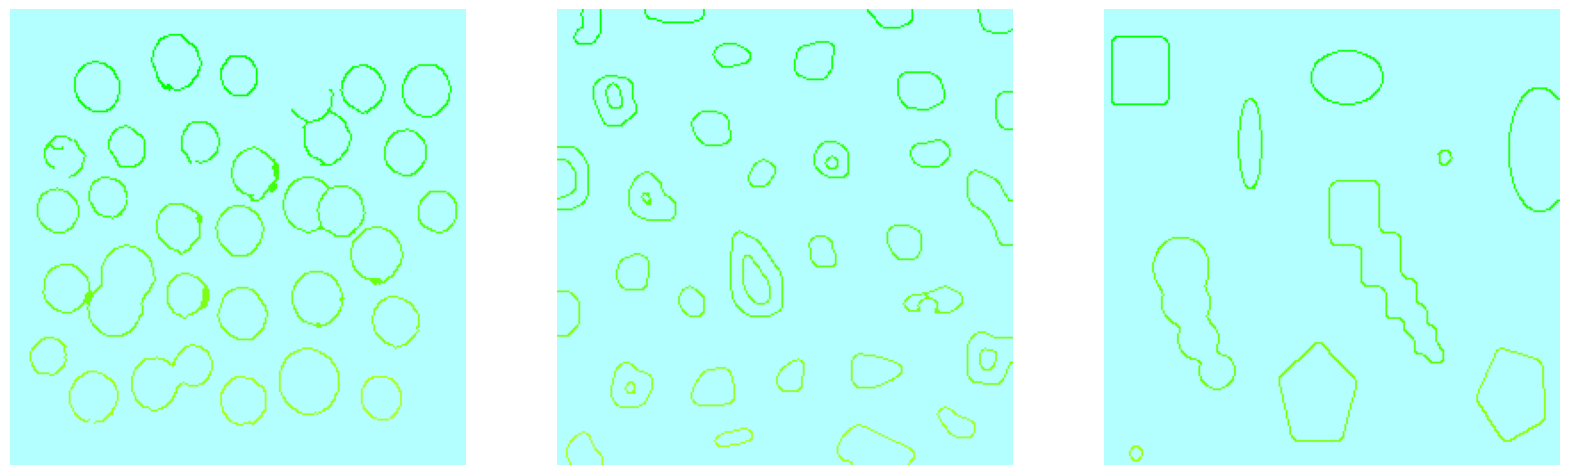

In [294]:
img_res_coins = get_color_hsv(img_res_coins,coins_cc,coins_counter)
img_res_bolhas = get_color_hsv(img_res_bolhas,bolhas_cc,bolhas_counter)
img_res_shapes = get_color_hsv(img_res_shapes,shapes_cc,shapes_counter)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_res_coins, cmap='hsv')
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_res_bolhas, cmap='hsv')
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_res_shapes, cmap='hsv')
plt.axis("off")

In [295]:
def get_color_rgb(imgRes,cc,counter):

    for i in range(counter):
        if i == 0:
            imgRes[cc == i] = [211,211,211]
        imgRes[cc == i + 1] = [255 / counter * i, counter * i, counter / (i + 1)]

    return imgRes

C:\Users\Tygsv\AppData\Local\Temp\ipykernel_8840\946483368.py:6: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 270 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  imgRes[cc == i + 1] = [255 / counter * i, counter * i, counter / (i + 1)]
C:\Users\Tygsv\AppData\Local\Temp\ipykernel_8840\946483368.py:6: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 300 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  imgRes[cc == i + 1] = [255 / counter * i, counter * i, counter / (i + 1)]
C:\Users\Tygsv\AppData\Local\Temp\ipykernel_8840\946483368.py:6: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to in

(-0.5, 255.5, 255.5, -0.5)

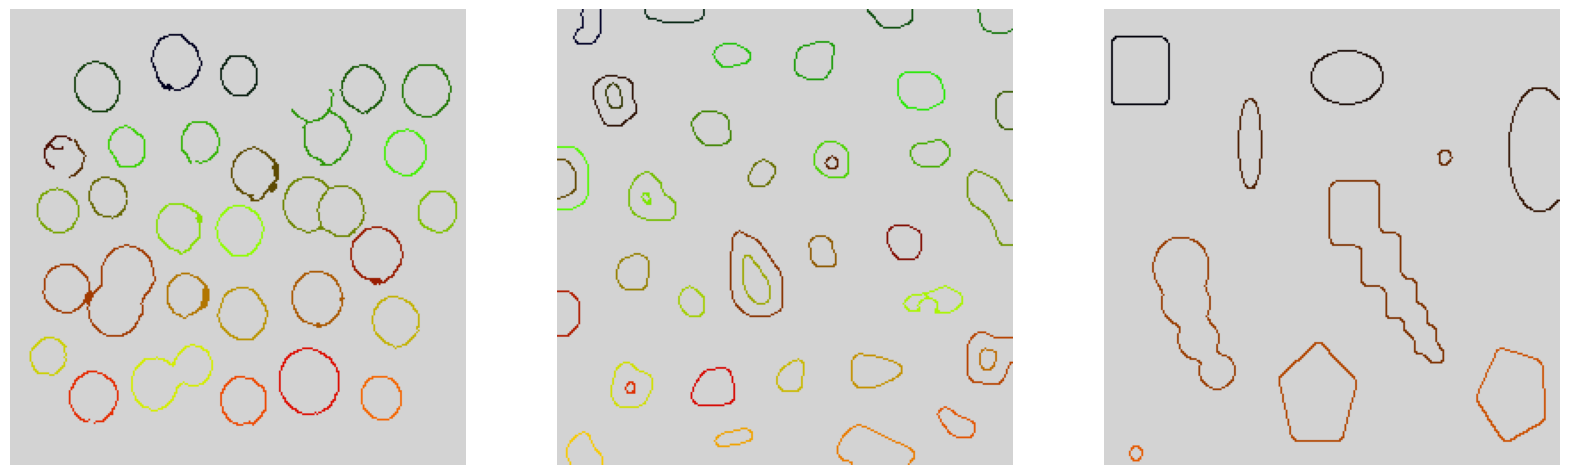

In [296]:
img_coins_cc_rgb = get_color_rgb(img_coins_cc_rgb,coins_cc,coins_counter)
img_bolhas_cc_rgb = get_color_rgb(img_bolhas_cc_rgb,bolhas_cc,bolhas_counter)
img_shapes_cc_rgb = get_color_rgb(img_shapes_cc_rgb,shapes_cc,shapes_counter)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_coins_cc_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_bolhas_cc_rgb)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_shapes_cc_rgb)
plt.axis("off")

In [297]:
def get_random_color_rgb(imgRes,cc,counter):
    ## atribui valores aleatorio de 0 a 255 para cada componente conexo
    for i in range(counter):
        r = random.randint(0,255)
        g = random.randint(0,255)
        b = random.randint(0,255)
        imgRes[cc==i+1] = [r,g,b]
    return imgRes

(-0.5, 255.5, 255.5, -0.5)

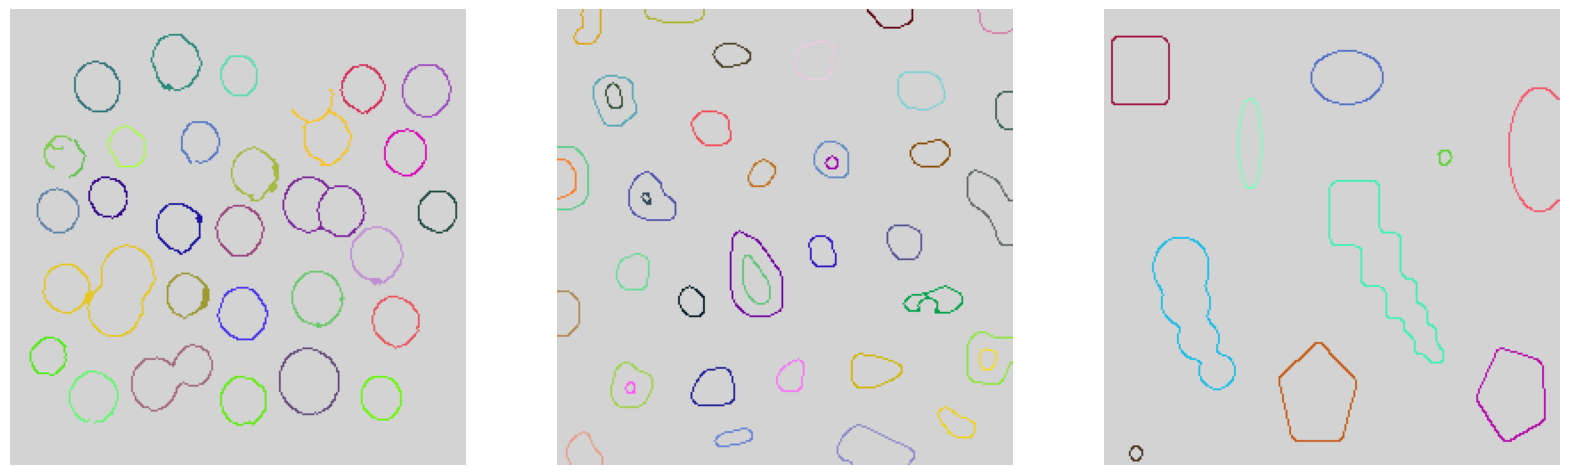

In [298]:
img_coins_cc_rgb = get_random_color_rgb(img_coins_cc_rgb,coins_cc,coins_counter)
img_bolhas_cc_rgb = get_random_color_rgb(img_bolhas_cc_rgb,bolhas_cc,bolhas_counter)
img_shapes_cc_rgb = get_random_color_rgb(img_shapes_cc_rgb,shapes_cc,shapes_counter)

plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(img_coins_cc_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_bolhas_cc_rgb)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_shapes_cc_rgb)
plt.axis("off")

## 5- Calculando a quantidade de pixels de cada objeto

In [299]:
def area_cc(cc, counter):
    for i in range(counter):
        print("Objeto ", i+1, ": ", np.sum(cc==i+1))
    return

In [300]:
print("Área dos componentes conexos da imagem de moedas:")
area_cc(coins_cc, coins_counter)

print("\nÁrea dos componentes conexos da imagem de bolhas:")
area_cc(bolhas_cc, bolhas_counter)

print("\nÁrea dos componentes conexos da imagem de formas:")
area_cc(shapes_cc, shapes_counter)


Área dos componentes conexos da imagem de moedas:
Objeto  1 :  114
Objeto  2 :  80
Objeto  3 :  96
Objeto  4 :  94
Objeto  5 :  102
Objeto  6 :  133
Objeto  7 :  80
Objeto  8 :  78
Objeto  9 :  89
Objeto  10 :  51
Objeto  11 :  33
Objeto  12 :  136
Objeto  13 :  79
Objeto  14 :  171
Objeto  15 :  84
Objeto  16 :  82
Objeto  17 :  107
Objeto  18 :  98
Objeto  19 :  126
Objeto  20 :  270
Objeto  21 :  115
Objeto  22 :  118
Objeto  23 :  105
Objeto  24 :  98
Objeto  25 :  76
Objeto  26 :  159
Objeto  27 :  129
Objeto  28 :  100
Objeto  29 :  102
Objeto  30 :  86

Área dos componentes conexos da imagem de bolhas:
Objeto  1 :  52
Objeto  2 :  42
Objeto  3 :  42
Objeto  4 :  28
Objeto  5 :  73
Objeto  6 :  57
Objeto  7 :  80
Objeto  8 :  89
Objeto  9 :  39
Objeto  10 :  35
Objeto  11 :  71
Objeto  12 :  62
Objeto  13 :  69
Objeto  14 :  61
Objeto  15 :  24
Objeto  16 :  37
Objeto  17 :  49
Objeto  18 :  89
Objeto  19 :  90
Objeto  20 :  22
Objeto  21 :  64
Objeto  22 :  132
Objeto  23 :  57
